In [1]:
# import sys, os
# clones_path = os.path.abspath('..')
# if clones_path not in sys.path:
#     sys.path.insert(0, clones_path)
    
import numpy as np
import matplotlib.pyplot as plt
from growth.sweep.sweep import Sweep
#from clones.annotation.validation.simulation import SimulationBenchmark
#from clones.annotation.bayesian import BayesianClassifier

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
ls ../synthetic/

Sweep_181128_214024/ Sweep_181130_160818/


In [2]:
sweep_path = '../synthetic/Sweep_181128_214024'
sweep = Sweep.load(sweep_path)

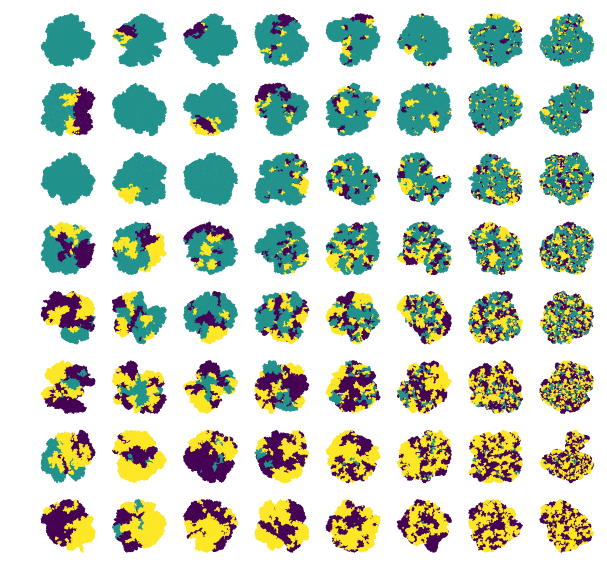

In [3]:
fig = sweep.plot_culture_grid(figsize=(10, 10), title=False, s=3)

# select batch

In [4]:
batch = sweep.batches[4, 0]

In [5]:
from clones.validation import BatchBenchmark

In [6]:
from clones.annotation.bayesian import BayesianClassifier

In [19]:
from subprocess import call
import sys
prefix = [sys.executable, '-m']

cmd = 'pip install pomegranate==0.10.0 --no-deps'.split()



call(prefix+cmd)

0

In [20]:
import pomegranate

In [11]:
b=BatchBenchmark(batch)

In [12]:
b.run()

In [19]:
sweep_path

'../synthetic/Sweep_181128_214024'

In [45]:
from clones.validation.sweep import SweepBenchmark

In [46]:
obj = SweepBenchmark(sweep_path)

In [47]:
obj.build()

In [52]:
obj.scales

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

ModuleNotFoundError: No module named 'pomegranate'

# evaluate benchmark

In [6]:
from clones.annotation.validation import BatchBenchmark
from clones.annotation.validation import SimulationBenchmark

In [10]:
benchmark = BatchBenchmark(batch, scale=3, num_replicates=1)

In [15]:
benchmark.run()

In [ ]:
benchmark

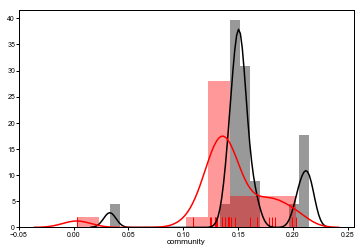

In [18]:
import seaborn as sns
fig, ax = plt.subplots()
sns.distplot(benchmark.results.simple, ax=ax, color='k')
sns.distplot(benchmark.results.community, ax=ax, rug=True, color='r')

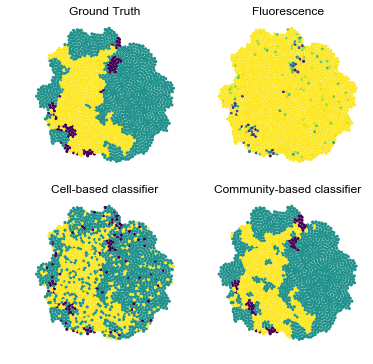

In [31]:
example = benchmark[benchmark.results.community.idxmax()]
example.show()

In [32]:
example.community_MAE

0.10841903598491748

In [ ]:
example.s

In [17]:
benchmark.results

,,simple,community
growth_replicate,fluorescence_replicate,,
0,0,0.151318,0.130396
1,0,0.033062,0.002944
2,0,0.149417,0.128869
3,0,0.150953,0.143661
4,0,0.142325,0.109107
5,0,0.213327,0.183261
6,0,0.152657,0.137668
7,0,0.214679,0.178466
8,0,0.153135,0.141444


In [19]:
import dill as pickle

# sample data

In [19]:
scale = 10
fluorescence_replicates = 1
data = batch.measure(scale=scale, replicates=fluorescence_replicates)

# train classifier

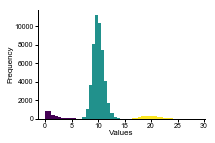

In [20]:
classify_on = 'r'
classifier = BayesianClassifier(data[classify_on].values, classify_on=classify_on)
classifier.show()

# apply to batch

In [ ]:
SimulationBenchmark

In [21]:
results = {}
for replicate_id, replicate in data.groupby(['growth_replicate', 'fluorescence_replicate']):
    print(replicate_id)
    #benchmark = Benchmark(replicate, classifier=classifier, rule='weighted', twolevel=True)
    #results[replicate_id] = [benchmark.simple_MAE, benchmark.community_MAE]

(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(8, 0)
(9, 0)
(10, 0)
(11, 0)
(12, 0)
(13, 0)
(14, 0)
(15, 0)
(16, 0)
(17, 0)
(18, 0)
(19, 0)
(20, 0)
(21, 0)
(22, 0)
(23, 0)
(24, 0)


In [ ]:
simple, community = np.vstack(list(results.values())).T

fig, ax = plt.subplots()
_ = ax.hist(simple, bins=50, color='b')
_ = ax.hist(community, bins=50, color='r')

In [25]:
adict = {}

for x in [(0,0), (1,2), (3, 3)]:
    
    adict[x] = dict(a=1, b=x[1])


In [41]:
df = pd.DataFrame.from_dict(adict, orient='index')
df.index.set_names(['AAA', 'BBB'], inplace=True)
df

,,a,b
AAA,BBB,,
0,0,1,0
1,2,1,2
3,3,1,3


In [27]:
import pandas as pd

In [ ]:
benchmark.show()

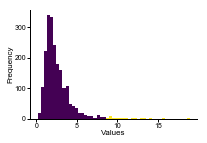

In [92]:
benchmark.cell_classifier.show()

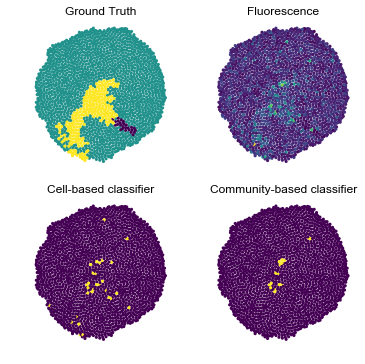

In [93]:
benchmark.show()

In [66]:
from clones.annotation.bayesian import BayesianClassifier

In [ ]:
"""
1. write method to aggregate batches
2. train cell classifier on whole batch
3. try merging clusters that improve posterior likelihood
4. run scoring on all simulations

"""

In [65]:
ls ../synthetic/

Sweep_181128_214024/ Sweep_181130_160818/ build_sweep.py


In [66]:
sweep_path = '../synthetic/Sweep_181128_214024'
sweep = Sweep.load(sweep_path)

In [5]:
SweepBe

annotation.ipynb               fluorescence_models.ipynb
benchmarking.ipynb             segmentation.ipynb
bleedthrough_correction.ipynb  selection.ipynb
classification.ipynb           synthetic_annotation.ipynb
clustering.ipynb               test.pkl
comparison.ipynb


In [71]:
ls ../synthetic/

Sweep_181128_214024/ Sweep_181130_160818/ build_sweep.py


In [4]:
from clones.validation.sweep import SweepBenchmark
sweep_path = '../synthetic/Sweep_181130_160818'
#sweep_path = '../synthetic/Sweep_181128_214024'

In [5]:
sweep_benchmark = SweepBenchmark.load(sweep_path)

In [13]:
sweep_benchmark.aggregate()

/Users/Sebi/.virtualenvs/clones/lib/python3.6/site-packages/dill/_dill.py:304: RuntimeWarning: invalid value encountered in true_divide
  obj = pik.load()


In [15]:
sweep_benchmark.results

NameError: name 'BenchmarkingResults' is not defined

In [19]:
import pandas as pd



    # save results
    #self._results = data
    #self._results.to_hdf(join(self.path, 'data.hdf'), key='results')

#     @property
#     def results(self):
#         """ Returns simulation results object. """
#         return SweepResults(self._results, self.shape)

In [20]:
data = aggregate(sweep_benchmark)

In [26]:
data.reset_index()

,growth_replicate,fluorescence_replicate,simple,community,batch_id,row_id,column_id,scale_id
0,0,0,0.200730,0.124088,0,0,0,0
1,0,0,0.251825,0.328467,0,0,0,1
2,0,0,0.202218,0.253654,1,0,1,0
3,0,0,0.019608,0.019608,1,0,1,1
4,0,0,0.295808,0.284850,2,0,2,0
5,0,0,0.000000,0.033333,2,0,2,1
6,0,0,0.259115,0.396267,3,0,3,0
7,0,0,0.000000,0.222222,3,0,3,1
8,0,0,0.303036,0.321167,4,1,0,0
9,0,0,0.036145,0.006024,4,1,0,1


In [10]:
sweep_benchmark.batches.shape

(2, 4)

In [8]:
sweep_benchmark.load_benchmark(0, 0).results

,,simple,community
growth_replicate,fluorescence_replicate,,
0,0,0.20073,0.124088


In [3]:
batch_benchmark = sweep_benchmark.load_benchmark(0, 0)

In [5]:
batch_benchmark.results

,,simple,community
growth_replicate,fluorescence_replicate,,
0,0,0.20073,0.124088


In [ ]:
batch_benchmark

In [15]:
batch_benchmark.batch

In [16]:
sweep_benchmark.sweep_path

'../synthetic/Sweep_181130_160818'

In [21]:
from os.path import curdir



'.'

In [109]:
sweep_benchmark.load_benchmark(0, 0).batch.paths

['simulations/0']

In [28]:
from os.path import join

In [24]:
i, j = 0, 0



In [29]:
from growth.sweep.batch import Batch

In [119]:
# convert Batch objects to new format


# fmt = lambda x: [p.split('/', maxsplit=1)[1] for p in x]
# #fmt = lambda x: [join('simulations', p) for p in x]

# for i in range(len(sweep_benchmark.benchmark_paths)):
#     for j in range(sweep_benchmark.num_scales):
#         path = join(sweep_benchmark.sweep_path, sweep_benchmark.benchmark_paths[i][j])
#         batch_benchmark = sweep_benchmark.load_benchmark(i, j)
#         old = batch_benchmark.batch
#         batch_benchmark.batch = Batch(fmt(old.paths), root=sweep_benchmark.sweep_path)
#         batch_benchmark.save(path)

['simulations/7']

In [97]:
batch_benchmark = sweep_benchmark.load_benchmark(0, 0)